# Load modules and data

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
DATA_PATH = "../data/heart_cleveland.csv"
df = pd.read_csv(DATA_PATH)

# Data exploration

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [10]:
num_columns = [
    "age",      # age in years
    "trestbps", # resting blood pressure
    "chol",     # serum cholestoral in mg/dl
    "thalach",  # maximum heart rate achieved
    "oldpeak",  # ST depression induced by exercise relative to rest
]

cat_columns = [
    "sex",      # (1 = male; 0 = female)
    "cp",       # chest pain type (0: typical angina 1: atypical angina 2: non-anginal pain 3: asymptomatic)
    "fbs",      # fasting blood sugar > 120 mg/dl
    "restecg",  # resting electrocardiographic results (0: normal 1: having ST-T wave abnormality 
                # (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
                # 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
    "exang",    # exercise induced angina (1 = yes; 0 = no)
    "slope",    # the slope of the peak exercise ST segment(0: upsloping; 1: flat; 2: downsloping)
    "ca",       # number of major vessels (0-3) colored by flourosopy
    "thal",     # 0 = normal; 1 = fixed defect; 2 = reversable defect 
]

# target: condition(0 = no disease, 1 = disease)

#### Target(condition) variable distribution

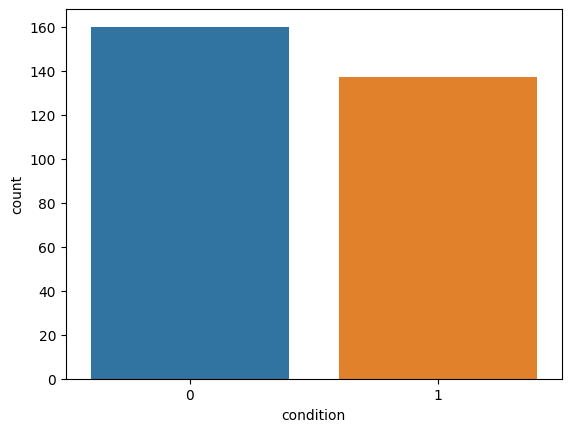

In [22]:
sns.countplot(x=df["condition"]);

Distribution of the target variable is balanced

#### Distributions of numerical variables

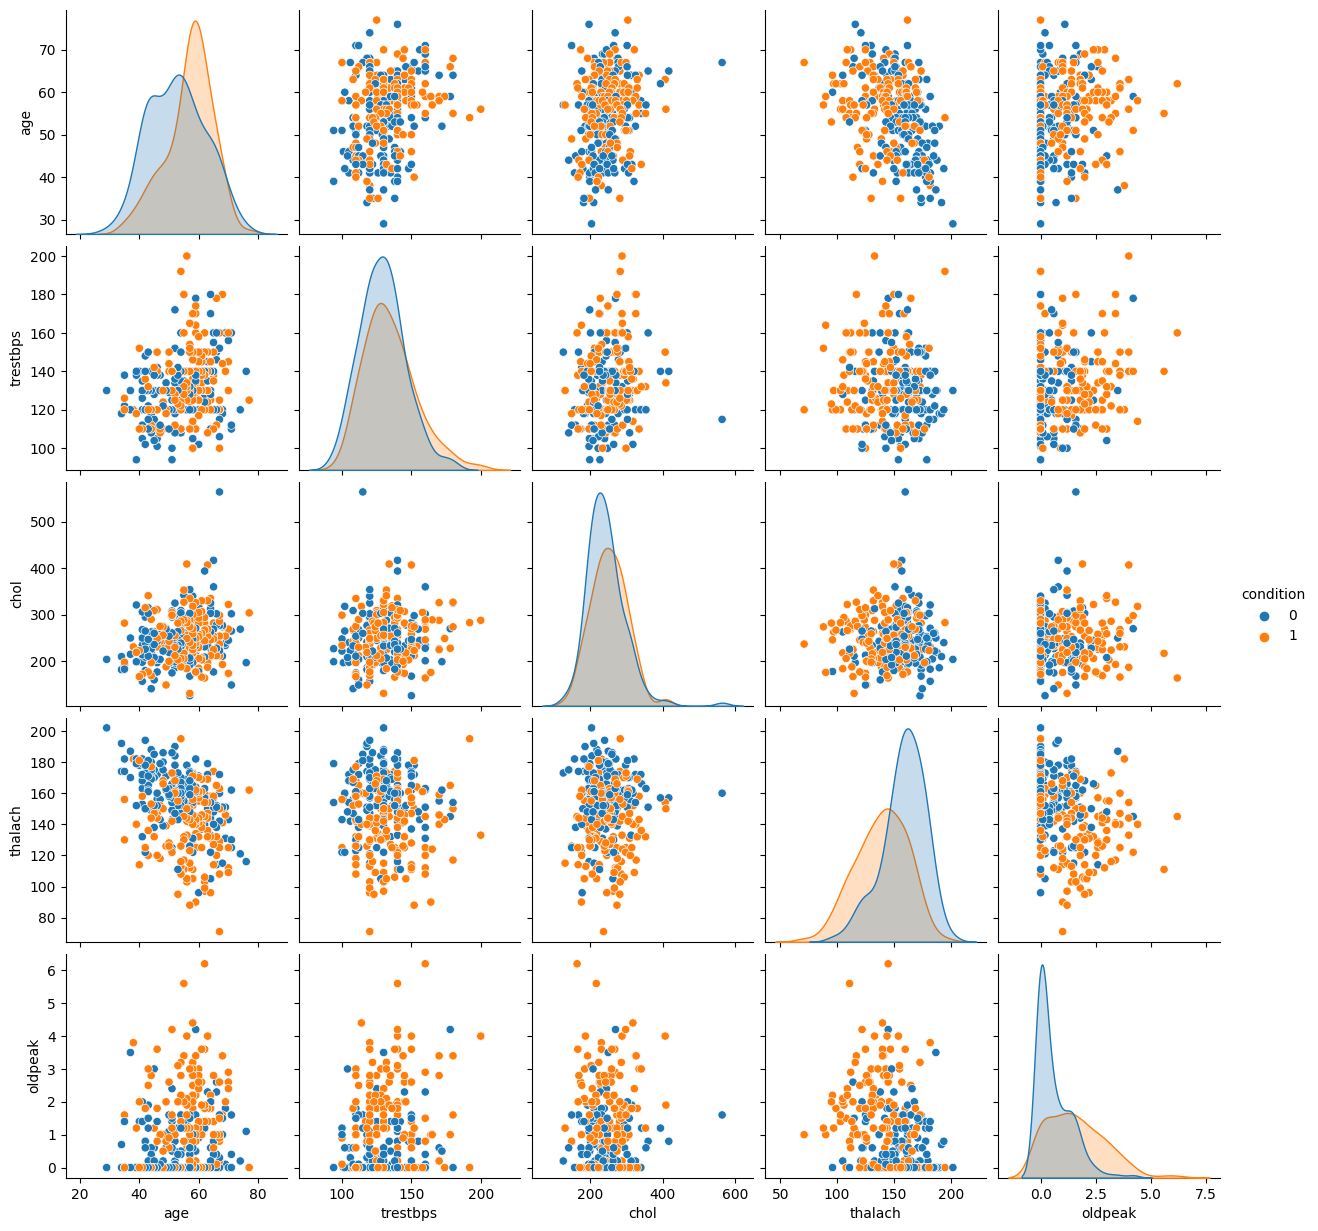

In [35]:
sns.pairplot(df[num_columns + ["condition"]], hue="condition");

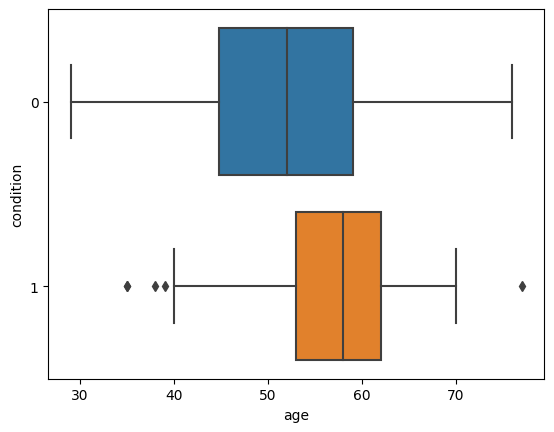

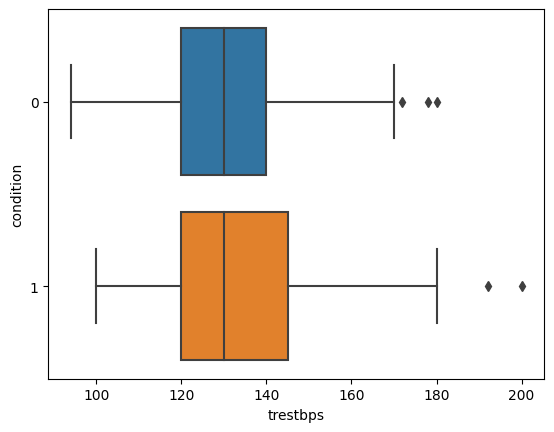

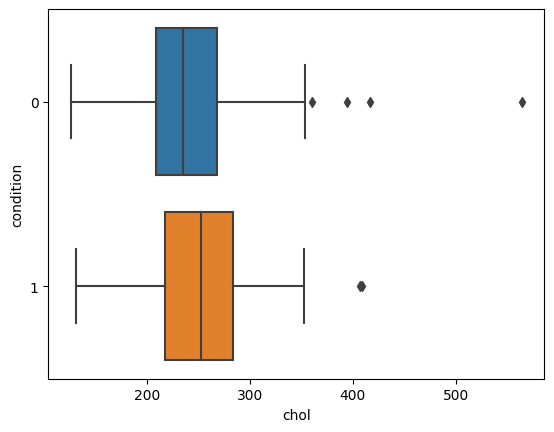

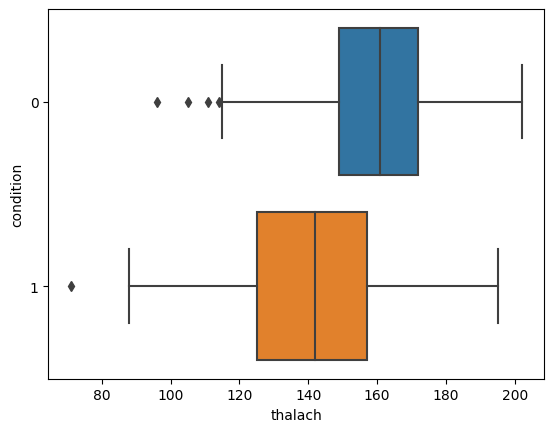

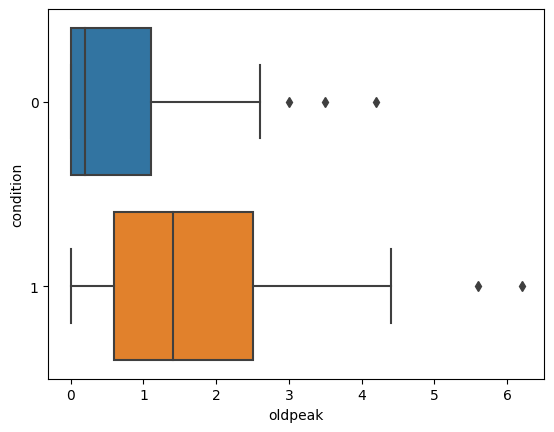

In [51]:
for col in num_columns:
    sns.boxplot(x=df[col], y=df["condition"], orient="h")
    plt.show()

Except for oldpeak, the distributions of all numerical features are similar to normal

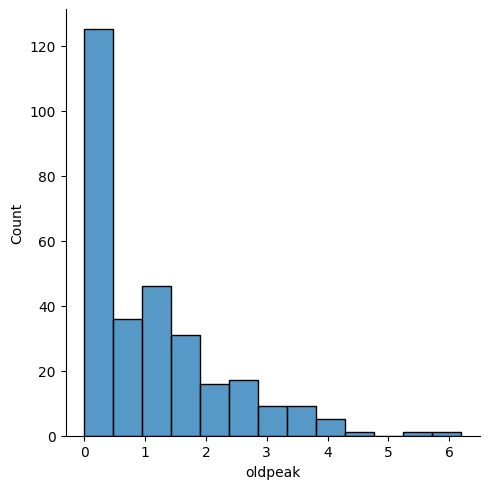

In [53]:
sns.displot(df["oldpeak"])

Oldpeak has a lot of zero values

#### Distributions of categorical variables

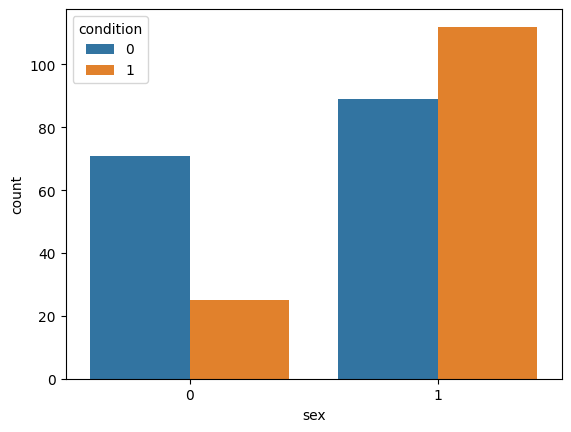

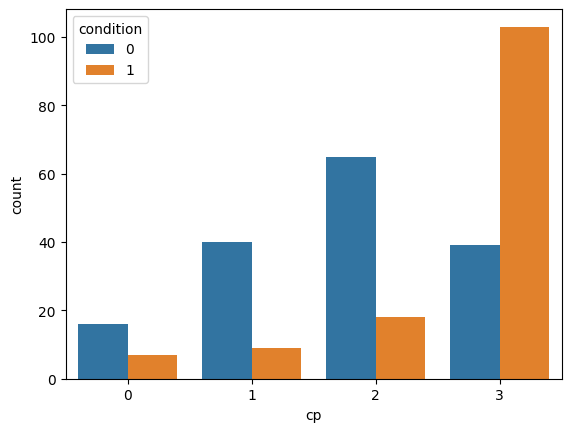

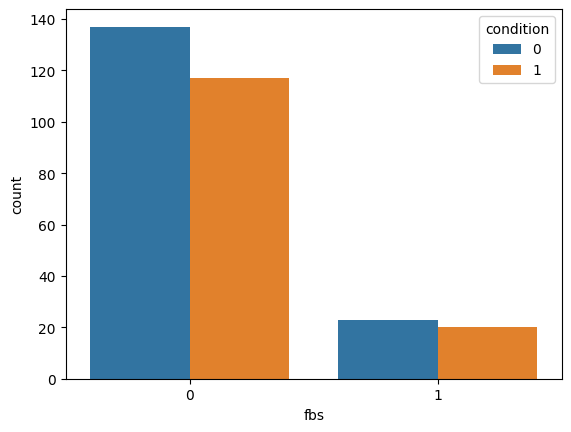

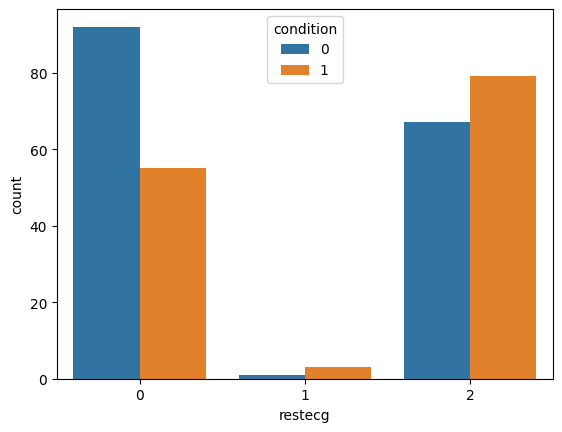

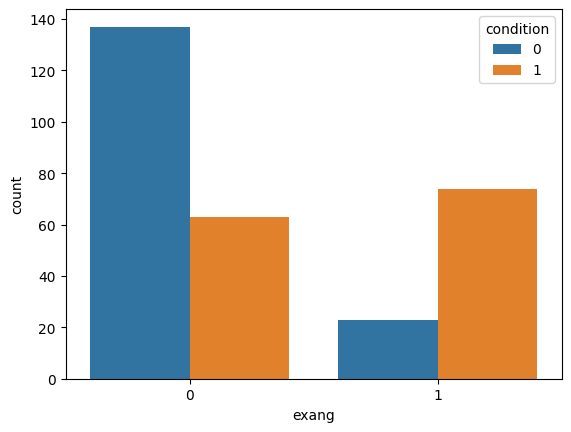

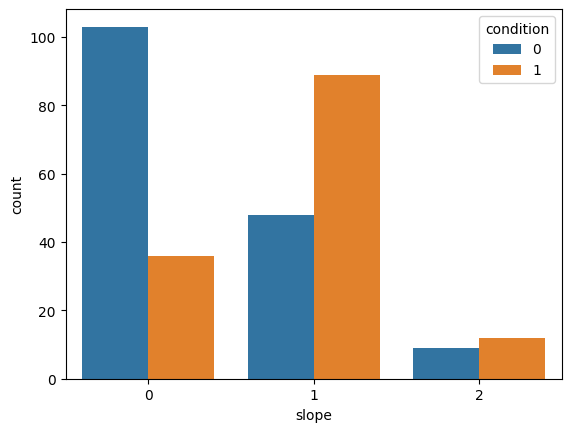

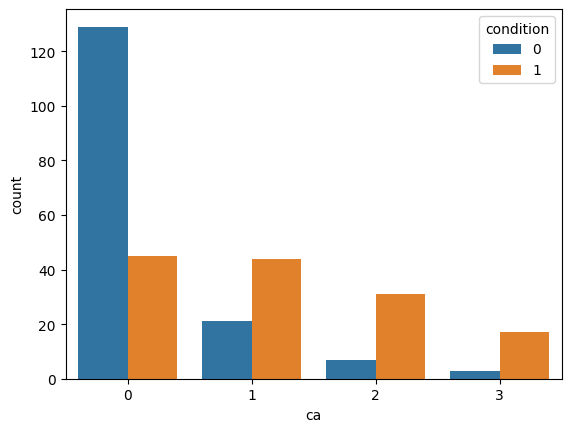

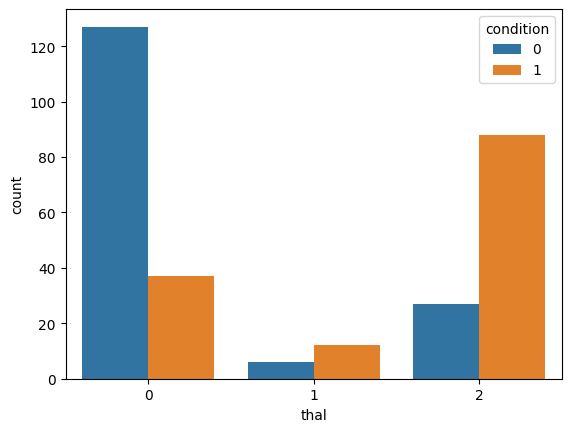

In [33]:
for col in cat_columns:
    sns.countplot(x=df[col], hue=df["condition"])
    plt.show()

All categorical features are not balanced relative to the target

#### Correlation matrix

<AxesSubplot: >

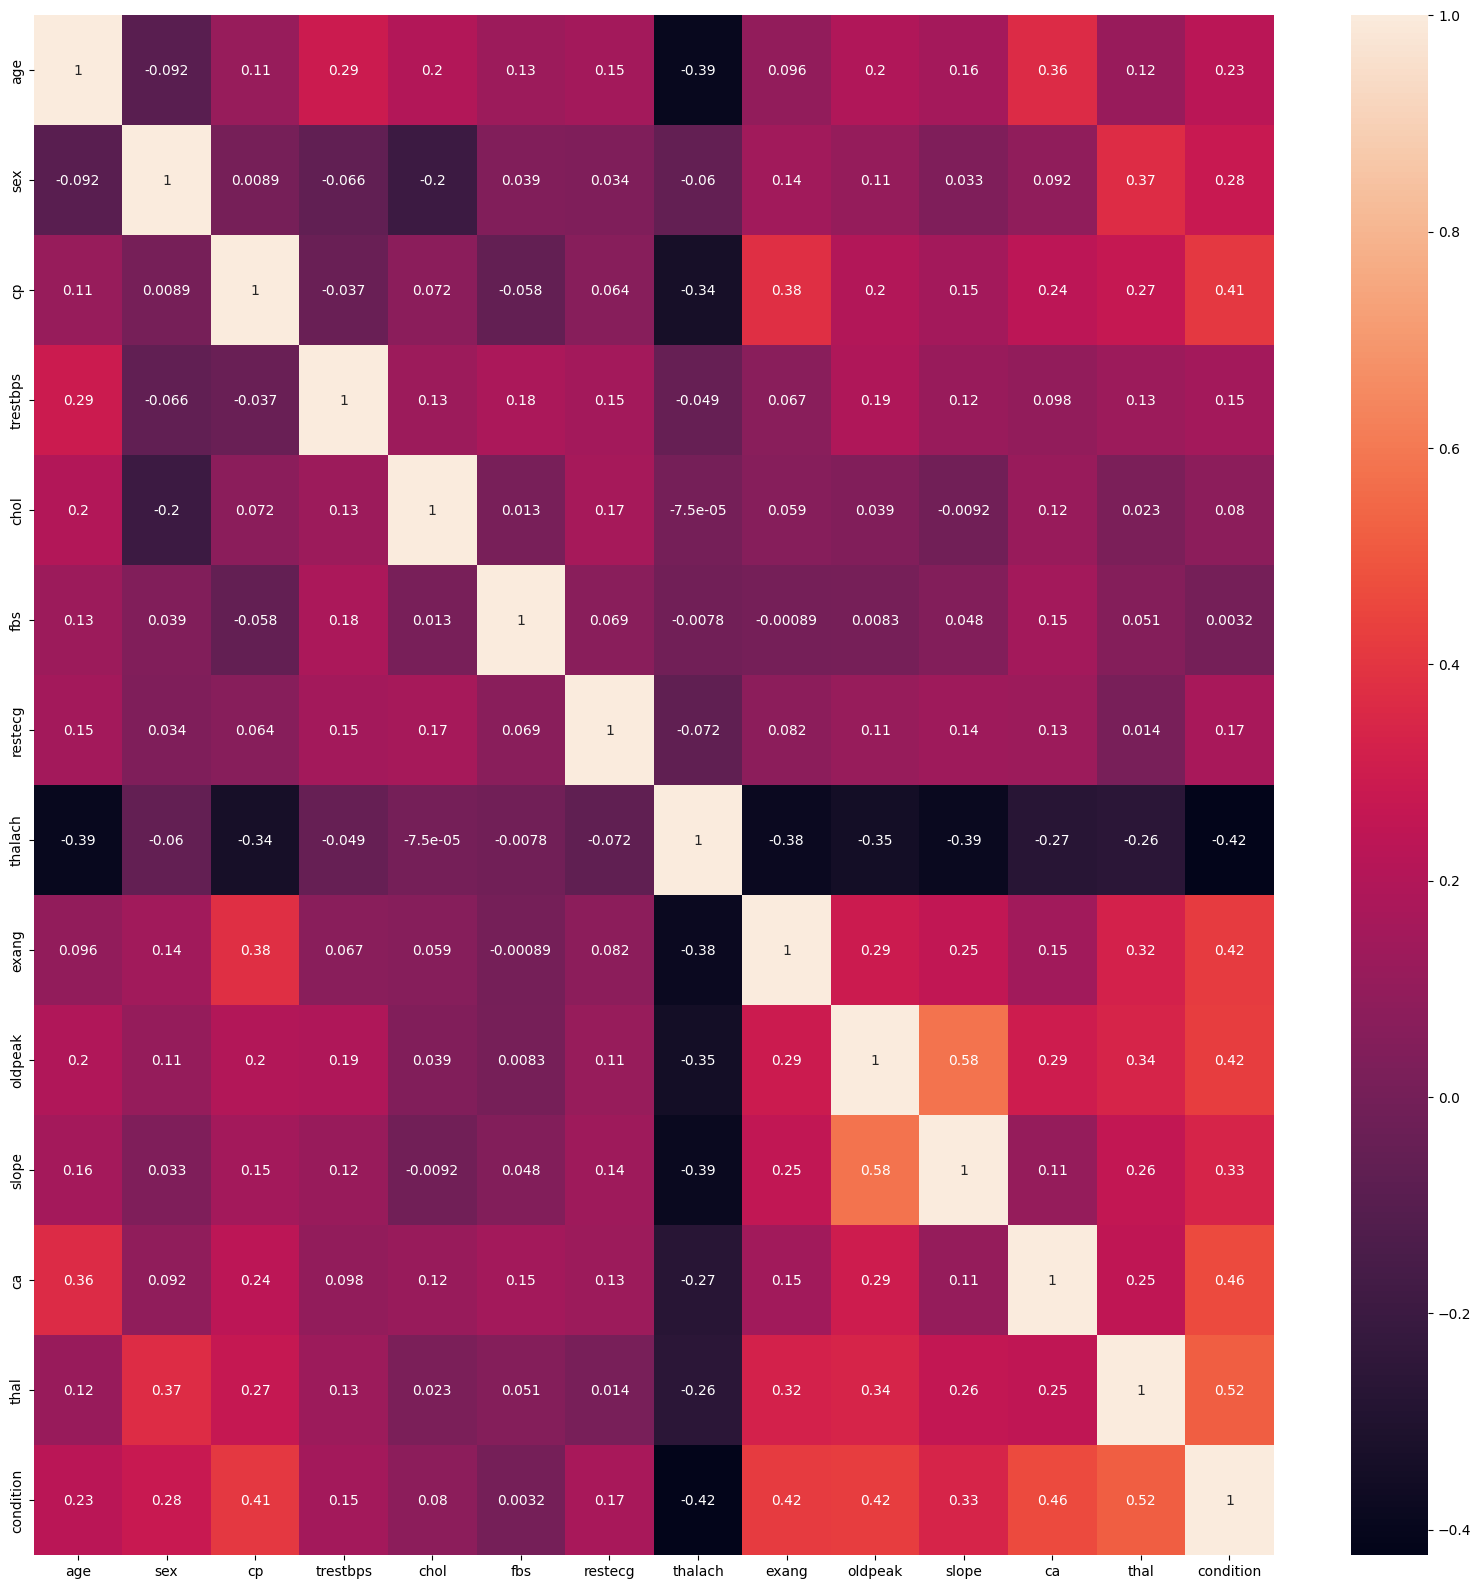

In [57]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

There are no columns that have a very strong correlation with each other